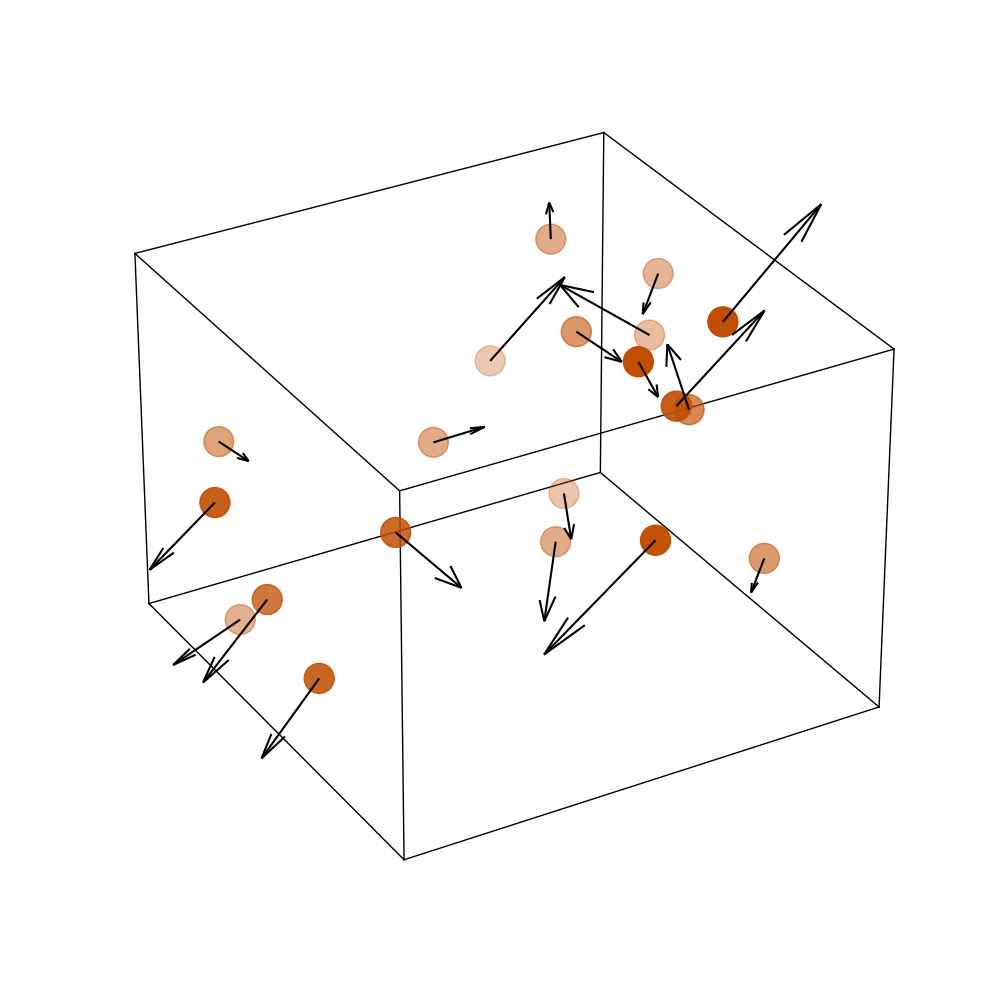

In [33]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# mpl.rcParams['savefig.facecolor'] = 'auto'

test = False
dispersion = True

if test:
  nclumps = 11
  clumpx = np.linspace(0,1,nclumps)
  clumpy = np.full(nclumps, 0.5)
  clumpz = np.zeros(nclumps)
elif dispersion:
  nclumps = 20
  clumpx = np.random.rand(nclumps)
  clumpy = np.random.rand(nclumps)
  clumpz = np.random.rand(nclumps)
  clumpvx = clumpx-0.5
  clumpvy = clumpy-0.5
  np.random.shuffle(clumpvx)
  np.random.shuffle(clumpvy)
  clumpv = np.sqrt(clumpx**2+clumpy**2)
else:
  nclumps = 10000
  clumpx = np.random.rand(nclumps)
  clumpy = np.random.rand(nclumps)
  clumpz = np.random.rand(nclumps)

fig = plt.figure(figsize=(10,10), dpi=100)
ax = fig.add_subplot(1,1,1,projection='3d')

ax.plot([0,1], [0,0], [0,0], c='k', lw=1)
ax.plot([0,1], [0,0], [1,1], c='k', lw=1)
ax.plot([0,1], [1,1], [0,0], c='k', lw=1)
ax.plot([0,1], [1,1], [1,1], c='k', lw=1)
ax.plot([0,0], [0,1], [0,0], c='k', lw=1)
ax.plot([0,0], [0,1], [1,1], c='k', lw=1)
ax.plot([1,1], [0,1], [0,0], c='k', lw=1)
ax.plot([1,1], [0,1], [1,1], c='k', lw=1)
ax.plot([0,0], [0,0], [0,1], c='k', lw=1)
ax.plot([0,0], [1,1], [0,1], c='k', lw=1)
ax.plot([1,1], [0,0], [0,1], c='k', lw=1)
ax.plot([1,1], [1,1], [0,1], c='k', lw=1)

ax.scatter(clumpx, clumpz, clumpy, s=(30*72/fig.dpi)**2, color='xkcd:burnt orange')
if dispersion:
  ax.quiver3D(clumpx, clumpz, clumpy, -clumpvy, clumpz-clumpz, clumpvx, length=0.5, color='xkcd:black')

ax.grid(False)
ax.set_axis_off()
ax.set_proj_type('persp')
ax.view_init(elev=30, azim=60)
fig.tight_layout()
plt.savefig('voxel.png', transparent=False, facecolor='grey')

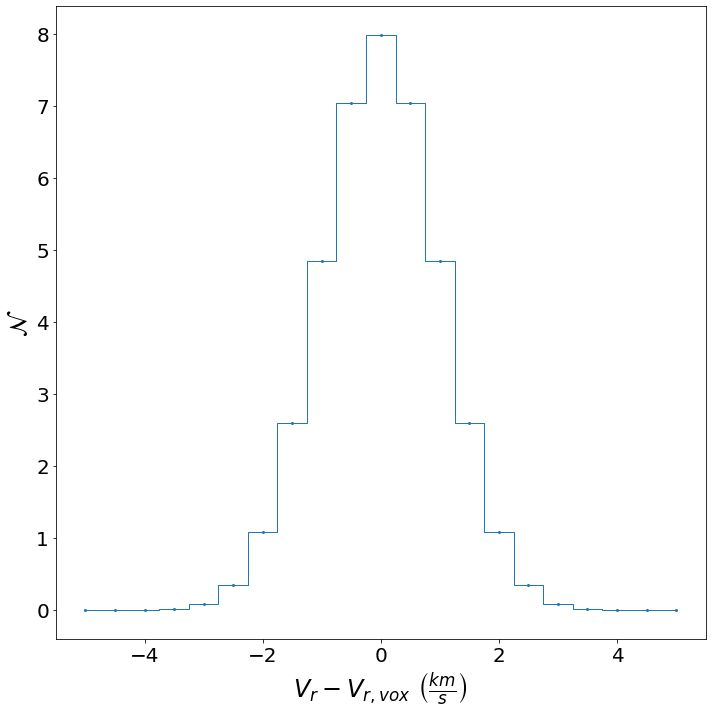

In [34]:
v = np.linspace(-5, 5, 21)
N = nclumps/np.sqrt(2*np.pi)/1*np.exp(-(v/(1))**2/2)

fig,ax = plt.subplots(figsize=(10,10))
ax.step(v, N, lw=1, marker='o', where='mid', ms=2)
ax.set_xlabel(r'$V_r-V_{r,vox} \ \left( \frac{km}{s} \right)$', fontsize=24)
ax.set_ylabel(r'$\mathcal{N}$', fontsize=24)
ax.tick_params(labelsize=20)
fig.tight_layout()
plt.savefig('voxel_ensemble.png', transparent=False, facecolor='grey')